In [1]:
import math
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as colors
%matplotlib inline
import pandas as pd
import numpy as np

sns.set(style="darkgrid")
#sns.set_style("whitegrid")
sns.set_context("paper")
sns.set(font_scale=2) 

In [2]:
df = pd.read_csv('Results/run_9b89d702.csv')
df2 = pd.read_csv('Results/run_f8e5b4bb.csv')
df3 = pd.read_csv('Results/run_ae361608.csv')

In [3]:
def plot_run(df, window_len= 20, color_code=(0, 0, 1), window='hanning'):
    
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
    
    x = df['Step'].tolist()
    y = df['Value'].tolist()

    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y_ = np.convolve(w/w.sum(),y ,mode='valid')
    x_ = x[window_len-1:] #np.convolve(w/w.sum(),x ,mode='valid')
    p = []
    plt.plot(x, y,  color=colors.to_rgba(color_code, alpha=0.2))
    p += plt.plot(x_, y_, color=color_code, linewidth=1.5)
    return p


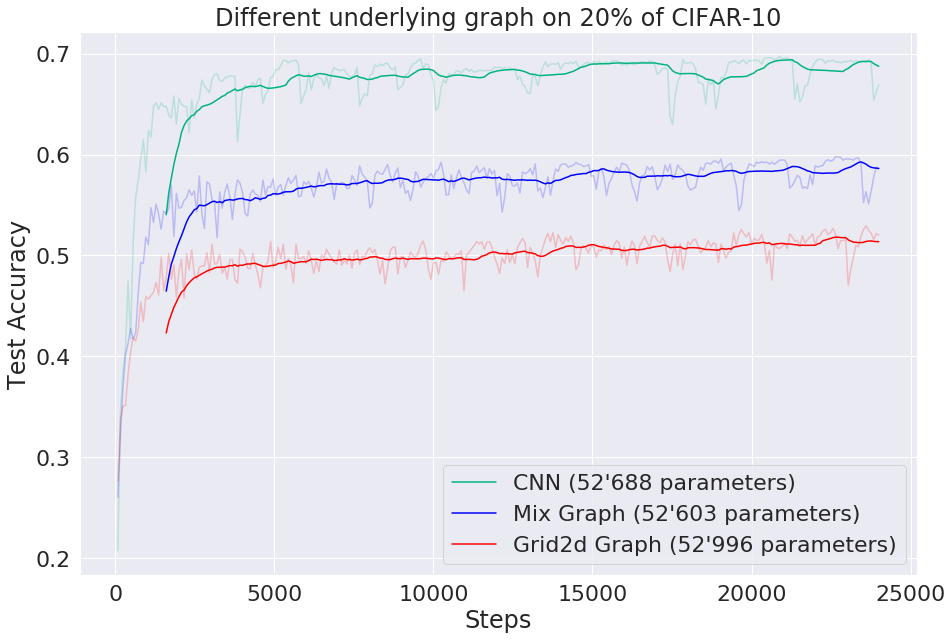

In [4]:
plt.figure(figsize=(15, 10))
plt.title('Different underlying graph on 20% of CIFAR-10')
plt.xlabel('Steps')
plt.ylabel('Test Accuracy')

# show the epochs
#plt.axvline(400, color=colors.to_rgba((0.5, 0.5, 0.5), alpha=0.4),
#            linestyle='--')

# plt.ylim(0, 1)

p = []
p += plot_run(df3, color_code=(0,0.7,0.5), window='flat')
p += plot_run(df, window='flat')
p += plot_run(df2, color_code=(1,0,0), window='flat')



plt.legend(p, ["CNN (52'688 parameters)", "Mix Graph (52'603 parameters)", "Grid2d Graph (52'996 parameters)"],
          loc='lower right')
plt.savefig("Results/accuracies.png")
plt.show()

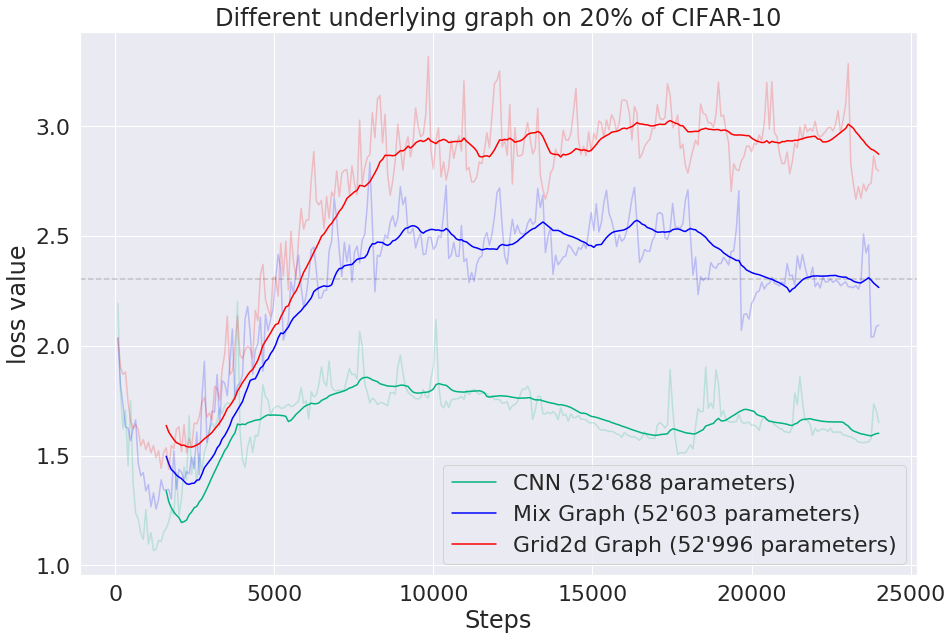

In [5]:
df = pd.read_csv('Results/run_9b89d702_loss.csv')
df2 = pd.read_csv('Results/run_f8e5b4bb_loss.csv')
df3 = pd.read_csv('Results/run_ae361608_loss.csv')

plt.figure(figsize=(15, 10))
plt.title('Different underlying graph on 20% of CIFAR-10')
plt.xlabel('Steps')
plt.ylabel('loss value')


# show random loss line
plt.axhline(math.log(10), color=colors.to_rgba((0.5, 0.5, 0.5), alpha=0.4),
            linestyle='--')



p = []
p += plot_run(df3, color_code=(0,0.7,0.5), window='flat')
p += plot_run(df, window='flat')
p += plot_run(df2, color_code=(1,0,0), window='flat')



plt.legend(p, ["CNN (52'688 parameters)", "Mix Graph (52'603 parameters)", "Grid2d Graph (52'996 parameters)"],
          loc='lower right')
plt.savefig("Results/losses.png")
plt.show()

## Same experiment on 100% of CIFAR-10

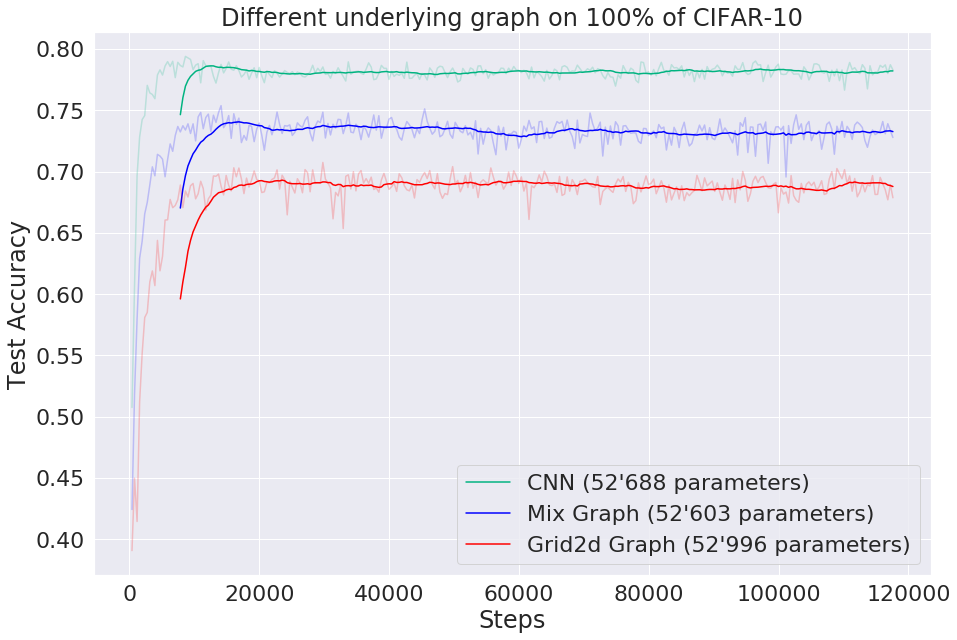

In [6]:
df = pd.read_csv('Results/run_959bf41f.csv')
df2 = pd.read_csv('Results/run_f2811198.csv')
df3 = pd.read_csv('Results/run_b646cd65.csv')

plt.figure(figsize=(15, 10))
plt.title('Different underlying graph on 100% of CIFAR-10')
plt.xlabel('Steps')
plt.ylabel('Test Accuracy')

# show the epochs
#plt.axvline(400, color=colors.to_rgba((0.5, 0.5, 0.5), alpha=0.4),
#            linestyle='--')

# plt.ylim(0, 1)

p = []
p += plot_run(df3, color_code=(0,0.7,0.5), window='flat')
p += plot_run(df, window='flat')
p += plot_run(df2, color_code=(1,0,0), window='flat')



plt.legend(p, ["CNN (52'688 parameters)", "Mix Graph (52'603 parameters)", "Grid2d Graph (52'996 parameters)"],
          loc='lower right')
plt.savefig("Results/accuracies_100_perc_CIFAR.png")
plt.show()

# On AID dataset

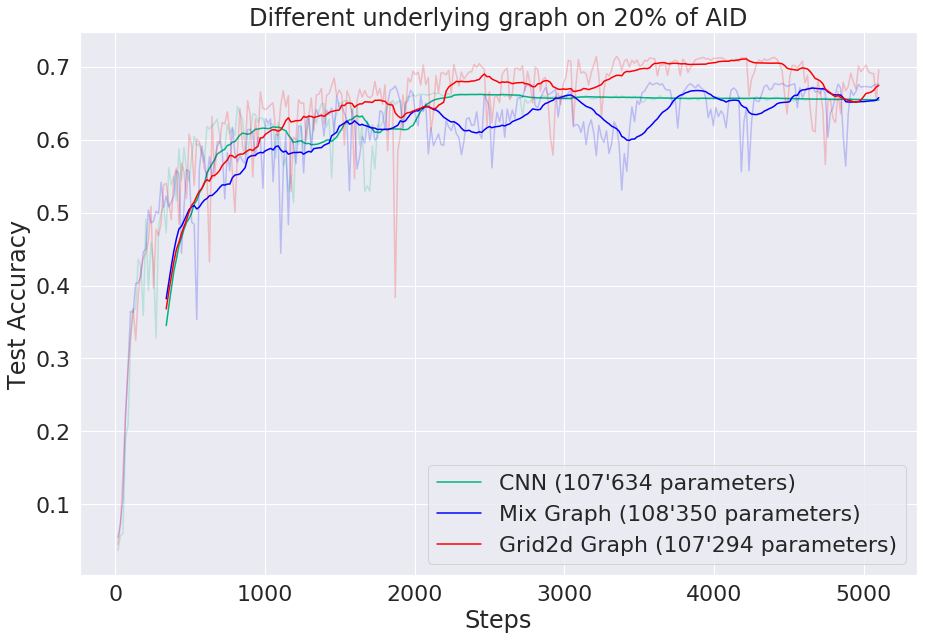

In [7]:
df = pd.read_csv('Results/run_ecadb885.csv')
df2 = pd.read_csv('Results/run_a0e11967.csv')
df3 = pd.read_csv('Results/run_837ab2ea.csv')

plt.figure(figsize=(15, 10))
plt.title('Different underlying graph on 20% of AID')
plt.xlabel('Steps')
plt.ylabel('Test Accuracy')

p = []
p += plot_run(df3, color_code=(0,0.7,0.5), window='flat')
p += plot_run(df, window='flat')
p += plot_run(df2, color_code=(1,0,0), window='flat')



plt.legend(p, ["CNN (107'634 parameters)", "Mix Graph (108'350 parameters)", "Grid2d Graph (107'294 parameters)"],
          loc='lower right')
plt.savefig("Results/accuracies_20_perc_AID.png")
plt.show()

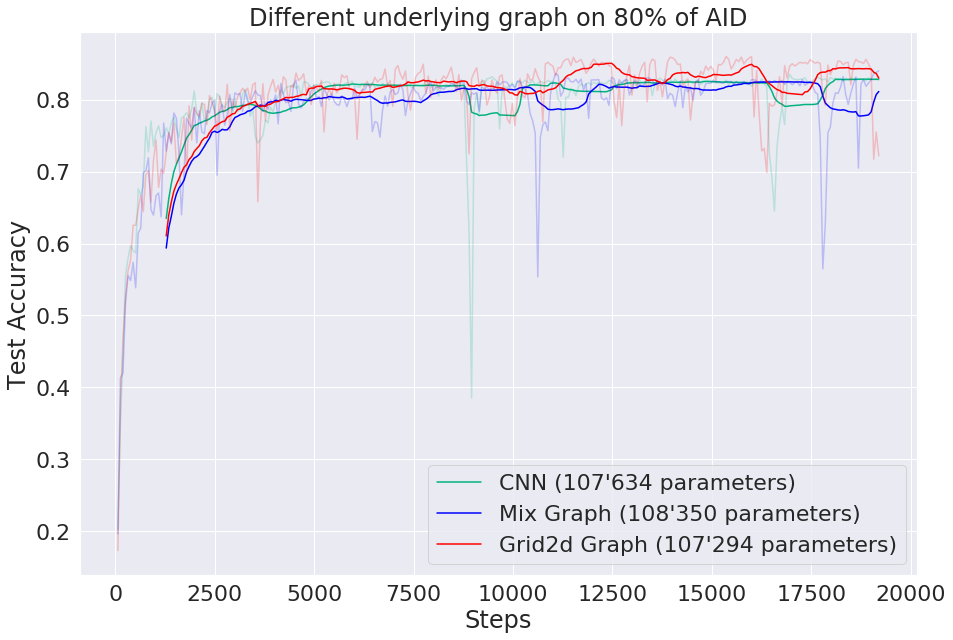

In [9]:
df = pd.read_csv('Results/run_f0876e86.csv')
df2 = pd.read_csv('Results/run_0df26214.csv')
df3 = pd.read_csv('Results/run_379a93dc.csv')

plt.figure(figsize=(15, 10))
plt.title('Different underlying graph on 80% of AID')
plt.xlabel('Steps')
plt.ylabel('Test Accuracy')

p = []
p += plot_run(df3, color_code=(0,0.7,0.5), window='flat')
p += plot_run(df, window='flat')
p += plot_run(df2, color_code=(1,0,0), window='flat')



plt.legend(p, ["CNN (107'634 parameters)", "Mix Graph (108'350 parameters)", "Grid2d Graph (107'294 parameters)"],
          loc='lower right')
plt.savefig("Results/accuracies_80_perc_AID.png")
plt.show()

## On CIFAR-10 with 20% K=5 vs K=2

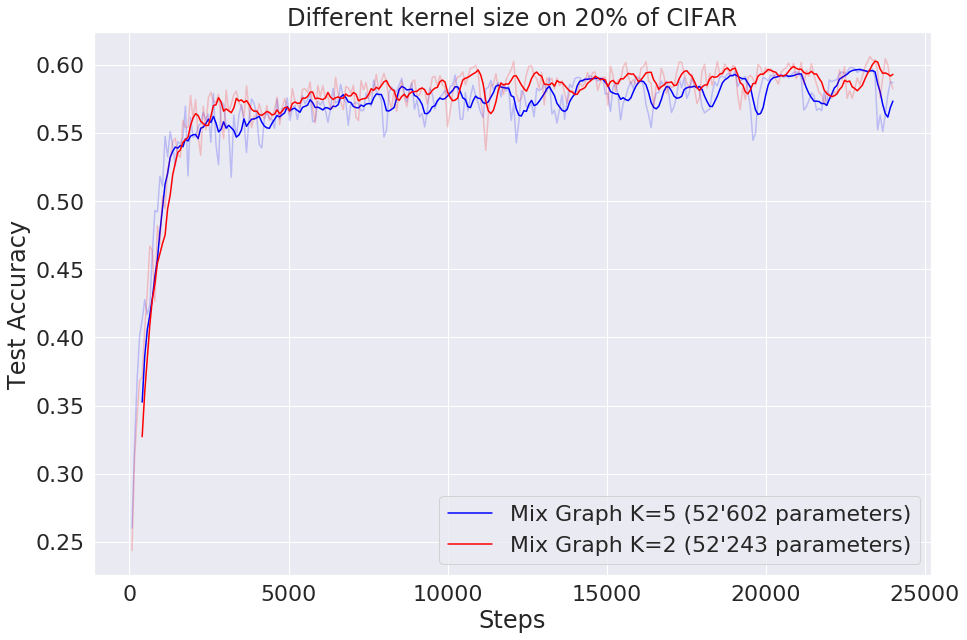

In [10]:
df = pd.read_csv('Results/run_9b89d702.csv')
df2 = pd.read_csv('Results/run_b3ec7f74.csv')

plt.figure(figsize=(15, 10))
plt.title('Different kernel size on 20% of CIFAR')
plt.xlabel('Steps')
plt.ylabel('Test Accuracy')

p = []
p += plot_run(df, window='flat', window_len=5)
p += plot_run(df2, color_code=(1,0,0), window='flat', window_len=5)



plt.legend(p, ["Mix Graph K=5 (52'602 parameters)", "Mix Graph K=2 (52'243 parameters)"],
          loc='lower right')
plt.savefig("Results/accuracies_20_perc_AID.png")
plt.show()